<a href="https://colab.research.google.com/github/vbayarri/SpainAI_2020_reto_NLP/blob/main/1.Jupyter/Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis de train and test data


## Importación de librerias

In [1]:
import base64
import requests
import io
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import pandas as pd

from ipywidgets import widgets, Layout
from IPython.core.display import display, HTML

%matplotlib inline

# Cool display option
def display_side_by_side(dfs:list, captions:list):
    """Display tables side by side to save vertical space
    Input:
        dfs: list of pandas.DataFrame
        captions: list of table captions
    """
    output = ""
    combined = dict(zip(captions, dfs))
    for caption, df in combined.items():
        output += df.style.set_table_attributes("style='display:inline'").set_caption(caption)._repr_html_()
        output += "\xa0\xa0\xa0"
    display(HTML(output))

## Importación de ficheros de datos


In [2]:
train = "https://raw.githubusercontent.com/vbayarri/SpainAI_2020_reto_NLP/main/0.Dataset/train.csv"
req = requests.get(train)
traindata = req.text
trainpd = pd.read_csv(io.StringIO(traindata), sep=",", dtype=str)

test = "https://raw.githubusercontent.com/vbayarri/SpainAI_2020_reto_NLP/main/0.Dataset/test_descriptions.csv"
req = requests.get(test)
testdata = req.text
testpd = pd.read_csv(io.StringIO(testdata), sep=",", dtype=str)

## Volumetrías de datos

Summarize Data

In [3]:
# create output widgets
widget1 = widgets.Output()
widget2 = widgets.Output()

# render in output widgets
with widget1:
    display(trainpd.head(10).style.set_caption('Train dataframe'))
    display(trainpd.describe())
    trainpd.info()
with widget2:
    display(testpd.head(10).style.set_caption('Test dataframe'))
    display(testpd.describe())
    testpd.info()

# add some CSS styles to distribute free space
box_layout = Layout(display='flex',
                    flex_flow='row',
                    justify_content='space-around',
                    width='auto'
                   )
    
# create Horisontal Box container
hbox = widgets.HBox([widget1, widget2], layout=box_layout)

# render hbox
hbox

In [10]:
trainpd['chars_name'] = trainpd['name'].apply(lambda x : len(x))
trainpd['words_name'] = trainpd['name'].apply(lambda x : len(x.split()))

trainpd['chars_description'] = trainpd['description'].apply(lambda x : len(x))
trainpd['words_description'] = trainpd['description'].apply(lambda x : len(x.split()))
trainpd['lines_description'] = trainpd['description'].apply(lambda x : len(x.split('\n')))

trainpd.head(10)

,name,description,chars_name,words_name,chars_description,words_description,lines_description
0,CROPPED JACKET TRF,Jacket made of a technical fabric with texture...,18,3,120,19,1
1,OVERSIZED SHIRT WITH POCKET TRF,Oversized long sleeve shirt with a round colla...,31,5,141,22,1
2,TECHNICAL TROUSERS TRF,High-waist trousers with a matching elastic wa...,22,3,81,11,1
3,SHIRT DRESS,Collared dress featuring sleeves falling below...,11,2,152,23,1
4,PUFF SLEEVE DRESS WITH PLEATS TRF,Loose-fitting midi dress with a round neckline...,33,6,218,33,1
5,FLORAL PRINT DRESS TRF,Midi dress with a round neckline and short sle...,22,4,168,27,1
6,PRINTED DRESS TRF,Midi dress with a shirt collar and sleeves fal...,17,3,184,30,1
7,PRINTED MIDI DRESS TRF,Dress with a round neck and long sleeves. Feat...,22,4,160,26,1
8,LOOSE-FITTING TEXTURED DRESS TRF,"Short dress featuring a round neckline, long w...",32,4,176,27,1
9,RUFFLED PRINTED DRESS TRF,Short dress featuring a round neckline and lon...,25,4,171,25,1


In [11]:
testpd['chars_description'] = testpd['description'].apply(lambda x : len(x))
testpd['words_description'] = testpd['description'].apply(lambda x : len(x.split()))
testpd['lines_description'] = testpd['description'].apply(lambda x : len(x.split('\n')))

testpd.head(10)

,description,chars_description,words_description,lines_description
0,"Knit midi dress with a V-neckline, straps and ...",109,17,1
1,"Loose-fitting dress with a round neckline, lon...",147,23,1
2,Nautical cap with peak.<br/><br/>This item mus...,105,14,1
3,Nautical cap with peak. Adjustable inner strap...,54,8,1
4,Nautical cap with side button detail.<br/><br/...,119,16,1
5,Faded short sleeve T-shirt with a round neckli...,229,39,1
6,Coat with a round collar and long sleeves. Fea...,170,28,1
7,Ripped T-shirt. Round neck and short sleeves<b...,73,10,1
8,Fitted top made from a polyamide blend. Featur...,115,16,1
9,Fitted top made from a polyamide blend. Featur...,123,18,1


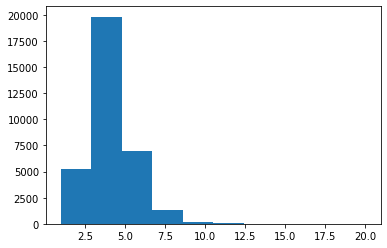

In [6]:
## Estatistics about columns

trainpd['chars_name'] = len(trainpd['name'])
trainpd.head(10)
trainpd['words_name'] = len(trainpd['name'])


name_len = []
description_len=[]
trainpd['name'].map(lambda x : name_len.append(len(x.split())))
trainpd['description'].map(lambda x : description_len.append(len(x.split())))
    
plt.hist(name_len)
plt.show()

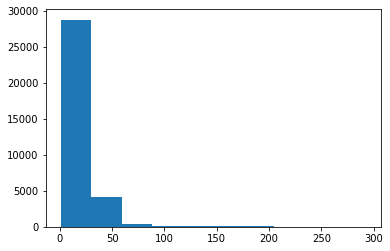

In [7]:
plt.hist(description_len)
plt.show()